## Dueling DQN
![dueling dqn](./image/dueling-dqn.png)

1. 这么做的初衷在于，有时候很多情况下状态足够差无论采用什么好的动作都无力回天，优势函数 $A$ 在状态不敏感的情况下非常有用。举个例子，在非常“平凡”的状态下，这时候选择一个好的动作非常关键，但是如果在一个非常差的情况下，动作的选择就不那么重要了。

2. 分类状态和动作，状态函数和动作无关，动作函数和状态无关，实验证明解耦和效果非常显著

3. 优势函数$A$是需要减去改状态下的所有的动作的平均水平的，这样可以比较好的衡量出动作的相对优劣

$$Q(s,a)=V(s) + A(s,a) - \frac{1}{|A|}\sum_{a'\in A} A(s,a)$$

In [1]:
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import clear_output
from brain.DuelingDQN import DuelingDQN
from utils import *
import gym
import time
import pandas
import numpy as np
import ipdb
import pickle
from tqdm import tqdm
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
%matplotlib inline

In [2]:
MEMORY_SIZE = 50000

In [3]:
env = gym.make('LunarLander-v2')
env.seed(1)     # reproducible, general Policy gradient has high variance
agent = DuelingDQN(n_actions=env.action_space.n, 
                   n_features=env.observation_space.shape[0], 
                   memory_size=MEMORY_SIZE,
                   learning_rate=0.0005,
                   e_greedy_increment=0.00001,
                   e_greedy=0.95,
                   replace_target_iter=2000,
                   reward_decay=0.99,
                   dueling=True, 
                   output_graph=True)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [4]:
final_rewards = []
running_reward = 0
step = 0
pbar = tqdm(range(1000))
for i_episode in pbar:
    observation = env.reset()
    rewards = []
    for t in range(200):
        action = agent.choose_action(observation)

        observation_, reward, done, info = env.step(action)
        rewards.append(reward)
        
        if done:
            reward = -200

        agent.store_transition(observation, action, reward, observation_)
        
        if step > 2000:
            agent.learn()

        if done:
            break
        observation = observation_
        step += 1
        
    if len(final_rewards) == 0:
        final_rewards.append((np.sum(rewards), np.sum(rewards)))
    else:
        final_rewards.append((np.sum(rewards), final_rewards[-1][-1] * 0.99 + 0.01 * np.sum(rewards)))
    pbar.set_description(f'Running Rewards: {round(final_rewards[-1][-1], 3)}, Current Rewards: {round(final_rewards[-1][0], 3)}')

Running rewards: 4.9655, Current rewards: -84.0: 100%|██████████| 1000/1000 [10:42<00:00,  1.54it/s]


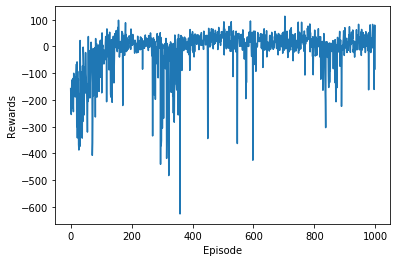

In [5]:
x = np.arange(len(final_rewards))
plt.plot(x, [i[0] for i in final_rewards])
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.savefig('./image/MTPG-cartpole.png')